<a href="https://colab.research.google.com/github/ysaxena/AI4ICPS/blob/main/SVM(different_kernels)_KNN_NaiveBayes_SupervisedLearning(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

At first, we are importing the necessary Python packages.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #seaborn makes more good looking plots
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [4]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [5]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [8]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Data Preprocessing (iloc we are doing for indexing)

In [10]:
X = data.iloc[:, :-1].values #X is predicted variable only : in first because we are accessing all the rows; -1 will drop the last column because we have to predict it
y = data.iloc[:, 4].values #y is the response variable

We have to split the data into train and test splits

In [11]:
from sklearn.model_selection import train_test_split # test_size is 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Data Scaling scaler.fit vs scaler.transform (fit calculates mean and standard deviation)

In [13]:
from sklearn.preprocessing import StandardScaler
#StandardScaler is a preprocessing technique in scikit-learn used for standardizing features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train) # calculating the mean and sd.
X_train = scaler.transform(X_train) #scaler.transform is used to standardize features by removing the mean and scaling to unit variance
X_test = scaler.transform(X_test)

**Naïve Bayes**

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train);

test the accuracy of the Naive Bayes classifier

In [16]:
y_pred = classifier.predict(X_train)

In [17]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9523809523809523


For Naive Bayes classifier accuracy is very good. Now, we have to make the prediction.

In [18]:
y_pred = classifier.predict(X_test)

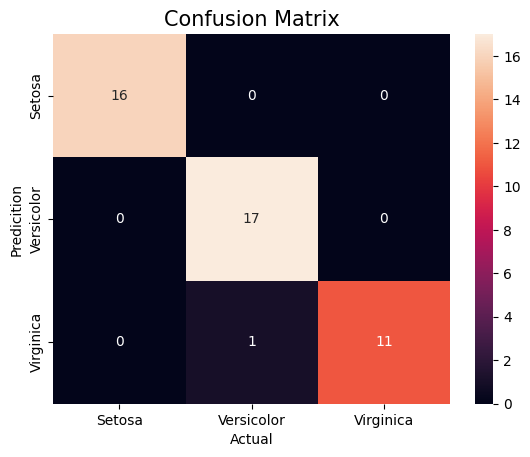

Confusion Matrix:
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g', # g mean general option
            xticklabels=['Setosa','Versicolor','Virginica'],
            yticklabels=['Setosa','Versicolor','Virginica'])
plt.ylabel('Predicition', fontsize=10)
plt.xlabel('Actual', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()
# normal graph
print("Confusion Matrix:")
print(result)

In [21]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


**SVM (Support Vector Machine)**

In [23]:
# import support vector classifier
# "Support Vector Classifier"
from sklearn.svm import SVC
accuracy_list = []

for i in ['linear','poly','rbf','sigmoid']:
  clf = SVC(kernel=i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of "+ i, 'is', float(accuracy))

accuracy of linear is 0.9714285714285714
accuracy of poly is 0.9047619047619048
accuracy of rbf is 0.9714285714285714
accuracy of sigmoid is 0.9238095238095239


In [25]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

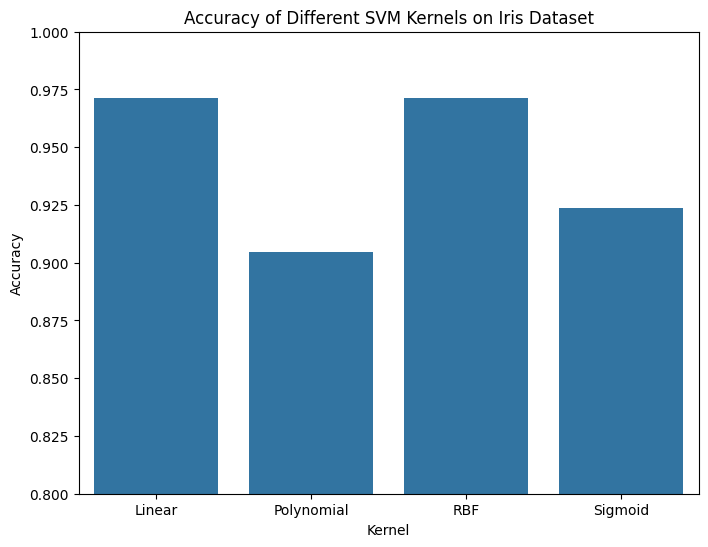

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8,1.0) # Set of y-axis limits for better visualization
plt.show()

In [30]:
accuracy_list = []

for i in ['linear','poly','rbf','sigmoid']:
  clf = SVC(kernel=i)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of "+i, "is", float(accuracy))

accuracy of linear is 0.9777777777777777
accuracy of poly is 0.9777777777777777
accuracy of rbf is 0.9777777777777777
accuracy of sigmoid is 0.8888888888888888


In [31]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

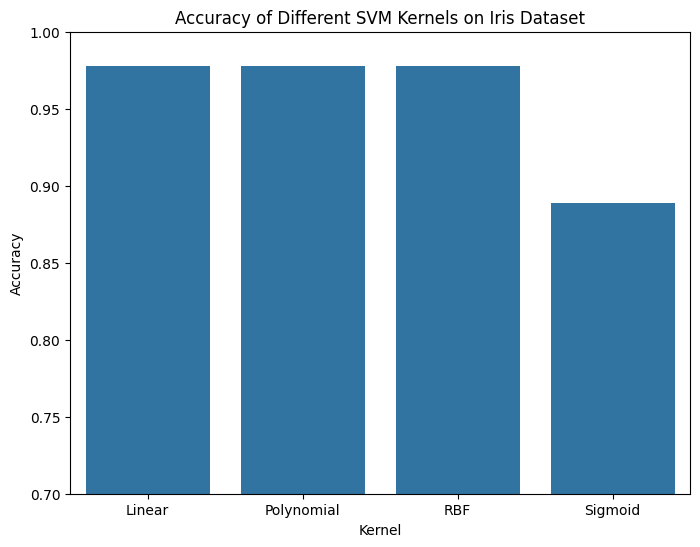

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.7,1.0) # Set of y-axis limits for better visualization
plt.show()

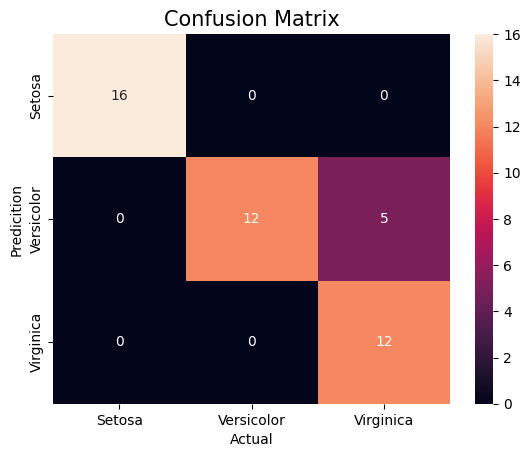

Confusion Matrix:
[[16  0  0]
 [ 0 12  5]
 [ 0  0 12]]


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g', # g mean general option
            xticklabels=['Setosa','Versicolor','Virginica'],
            yticklabels=['Setosa','Versicolor','Virginica'])
plt.ylabel('Predicition', fontsize=10)
plt.xlabel('Actual', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()
# normal graph
print("Confusion Matrix:")
print(result)

**K Nearest Neighbours (KNN)**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [35]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9619047619047619


In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [39]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9428571428571428


In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [43]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9619047619047619


Highest accuracy at K = 8 0.9619

In [44]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

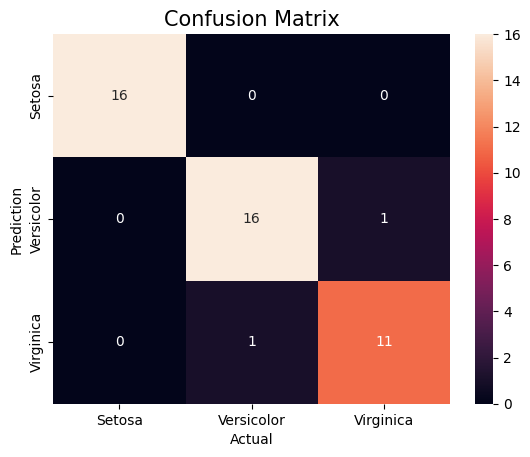

In [48]:
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [49]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556
